<a href="https://colab.research.google.com/github/rabinam24/NLP_sentimental_project/blob/main/NLP_Human_Emotion_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.stem import PorterStemmer
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
df_path='/content/drive/MyDrive/train.txt'


In [9]:
df=pd.read_csv(df_path,header=None,sep=";",names=["Comment","Emotion"], encoding="utf-8")
df["Length"]=[len(x) for x in df["Comment"]]
df


,Comment,Emotion,Length
0,i didnt feel humiliated,sadness,23
1,i can go from feeling so hopeless to so damned...,sadness,108
2,im grabbing a minute to post i feel greedy wrong,anger,48
3,i am ever feeling nostalgic about the fireplac...,love,92
4,i am feeling grouchy,anger,20
...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,101
15996,i am now turning and i feel pathetic that i am...,sadness,102
15997,i feel strong and good overall,joy,30
15998,i feel like this was such a rude comment and i...,anger,59


In [10]:
df['Comment'][8]

'i have been with petronas for years i feel that petronas has performed well and made a huge profit'

In [11]:
df.shape

(16000, 3)

In [12]:
df.isnull().sum()

Comment    0
Emotion    0
Length     0
dtype: int64

In [13]:
df.duplicated().sum()

1

In [14]:
df=df.drop_duplicates()

In [15]:
df

,Comment,Emotion,Length
0,i didnt feel humiliated,sadness,23
1,i can go from feeling so hopeless to so damned...,sadness,108
2,im grabbing a minute to post i feel greedy wrong,anger,48
3,i am ever feeling nostalgic about the fireplac...,love,92
4,i am feeling grouchy,anger,20
...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,101
15996,i am now turning and i feel pathetic that i am...,sadness,102
15997,i feel strong and good overall,joy,30
15998,i feel like this was such a rude comment and i...,anger,59


# EDA

In [16]:
emotion_count= df["Emotion"].value_counts()
emotion_count

joy         5361
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: Emotion, dtype: int64

Text(0.5, 1.0, 'Emotion Count')

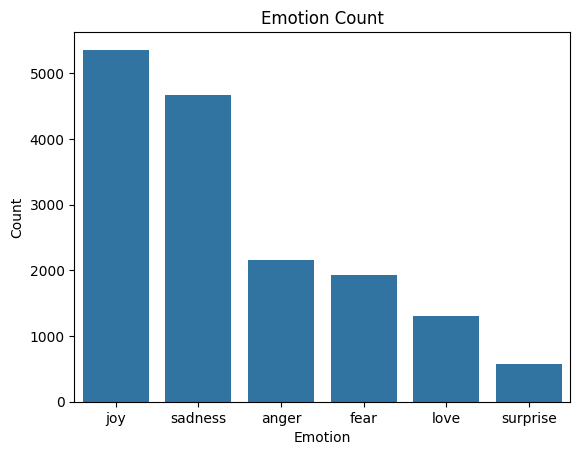

In [17]:
sns.barplot(x=emotion_count.index,y=emotion_count)
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.title("Emotion Count")

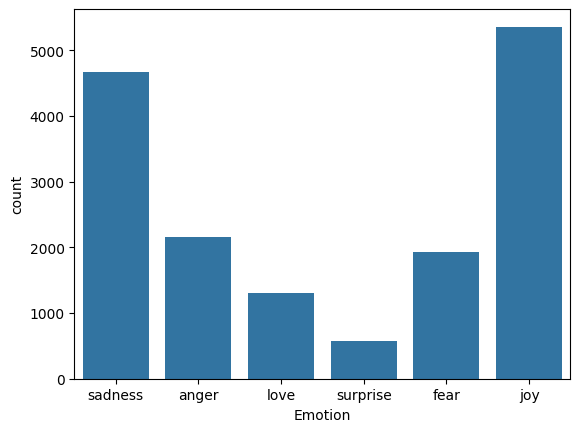

In [18]:
sns.countplot(x=df["Emotion"])
plt.show()

# Data Distribution

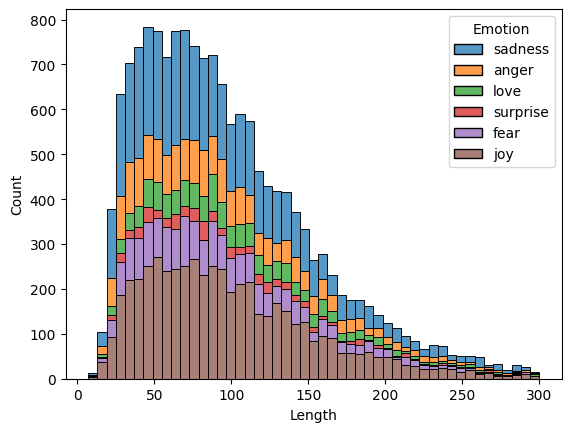

In [19]:
df1= df.copy()
length_values= df1['Length'].values
sns.histplot(data=df1, x="Length", hue="Emotion",multiple="stack")
plt.show()

In [20]:
#From the above image, we can observe that our data is right-skewed, as the majority of the distribution is on the left side, with a tail extending towards the right side

# WordCloud

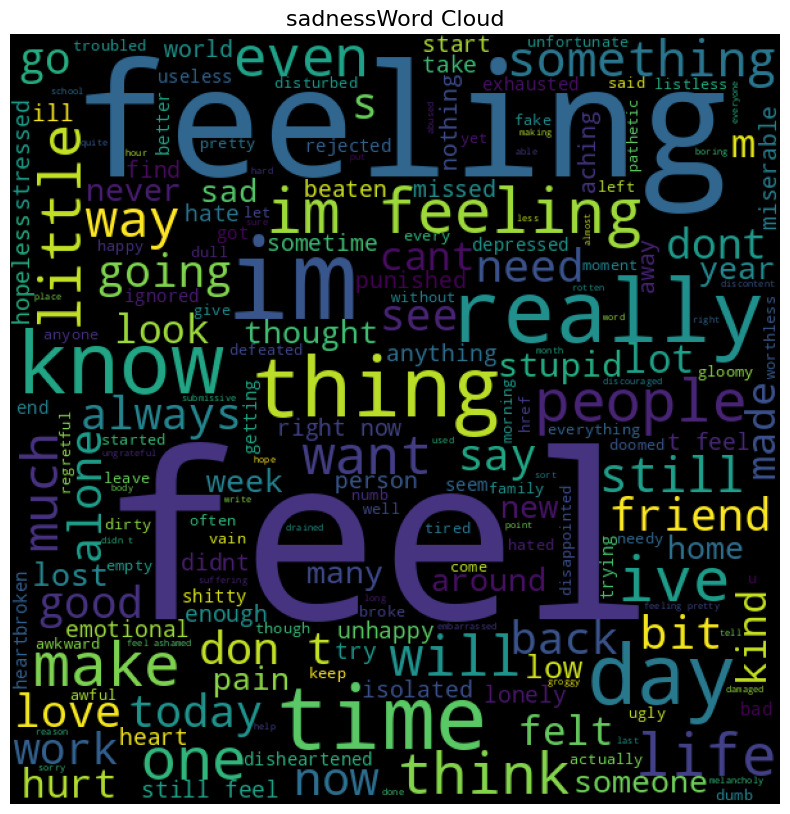

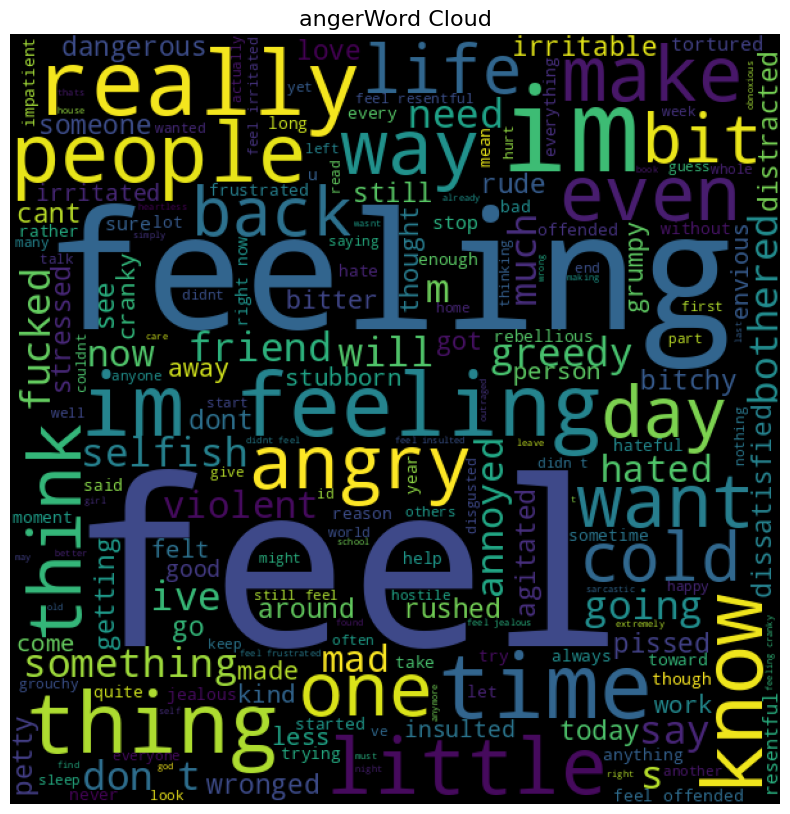

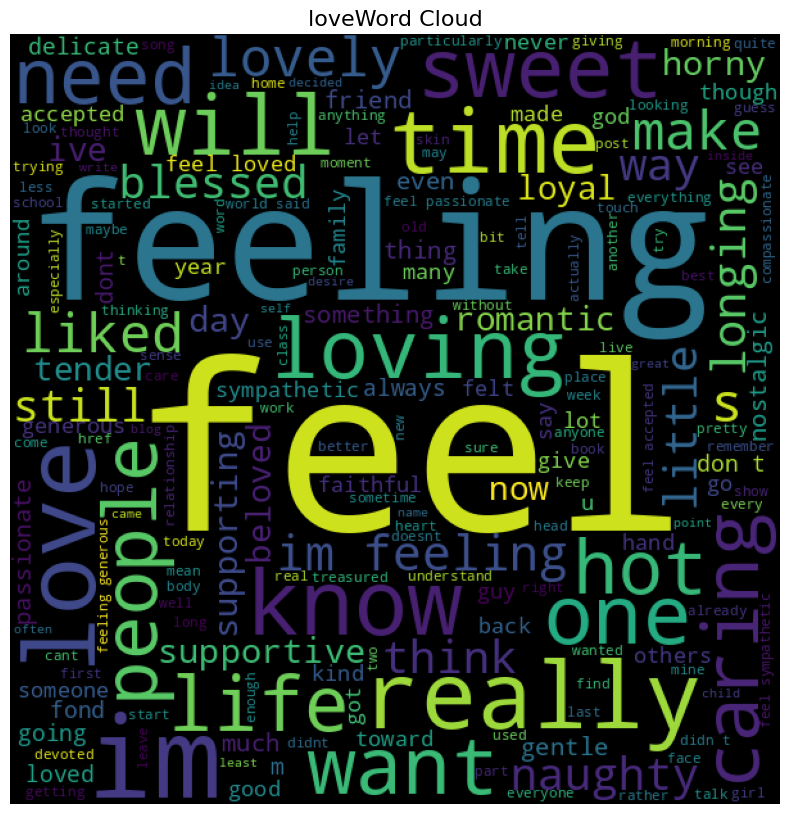

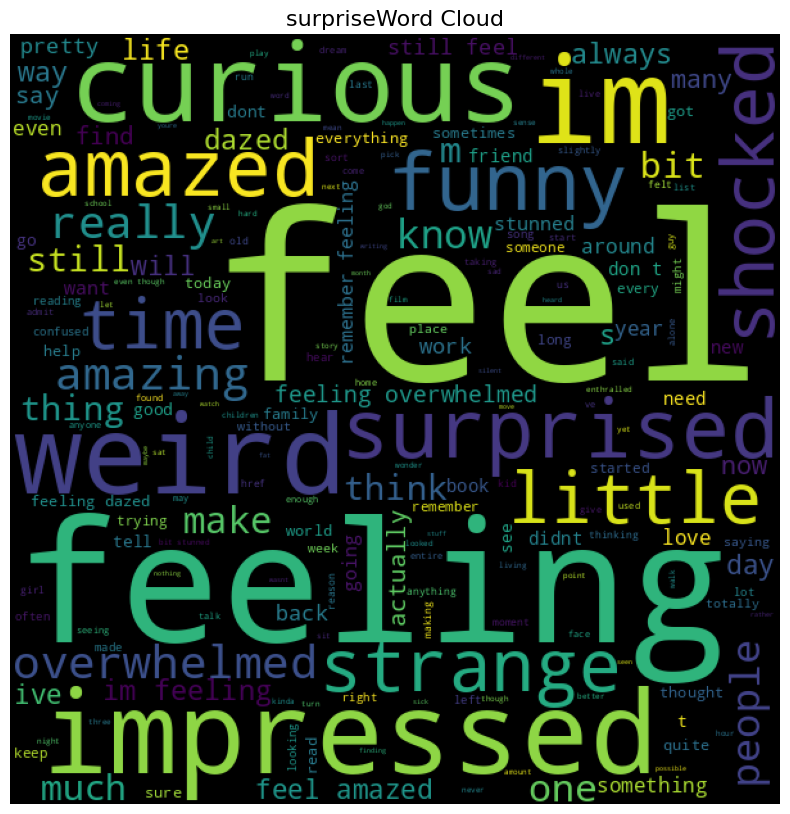

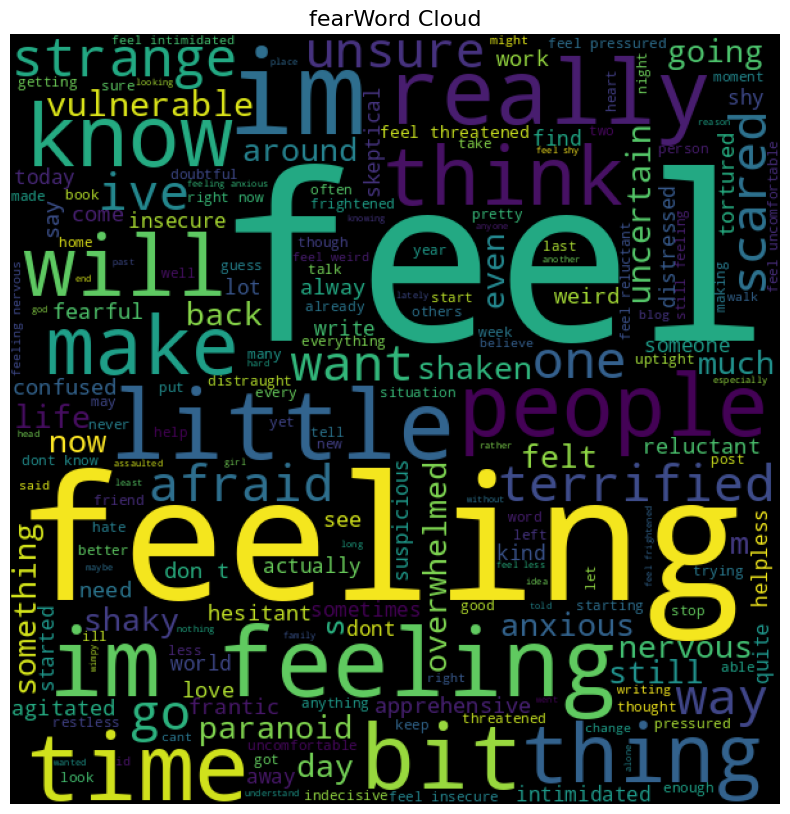

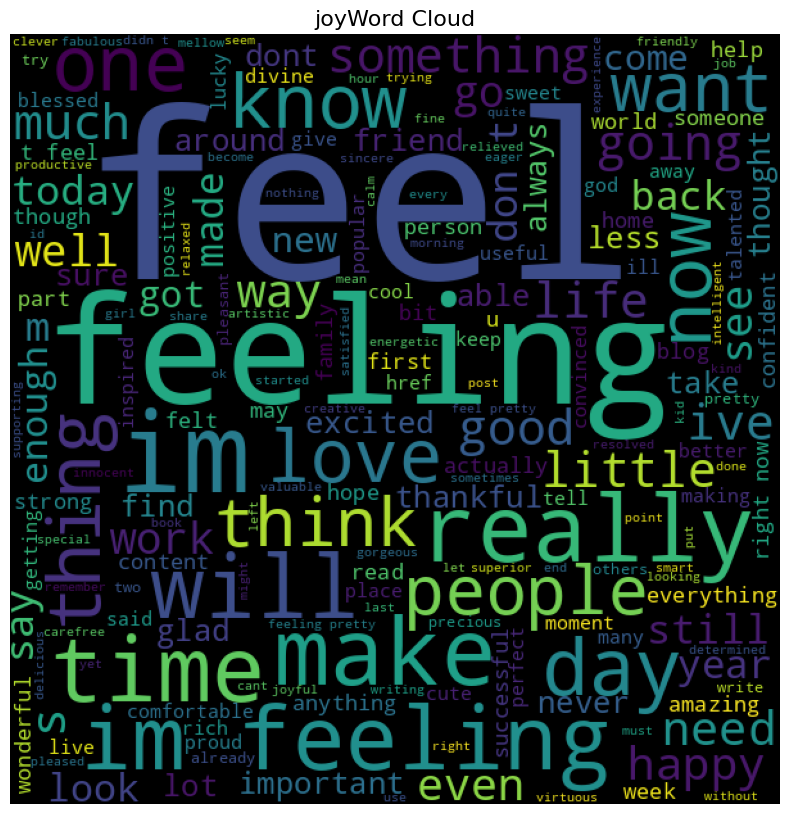

In [21]:
def words_cloud(wordcloud,df):
  plt.figure(figsize=(10,10))
  plt.title(df+ "Word Cloud", size= 16)
  plt.imshow(wordcloud)
  plt.axis('off');

emotionlist= df['Emotion'].unique()
for emotion in emotionlist:
  text=' '.join([sentence for sentence in df.loc[df['Emotion']== emotion,'Comment']])
  wordcloud= WordCloud(width= 600, height=600).generate(text)
  words_cloud(wordcloud,emotion)



# Data Preprocessing

# Encode Emotions

In [22]:
lb = LabelEncoder()
df['EmotionLabel'] = lb.fit_transform(df['Emotion'])

<ipython-input-22-b056bca8a90d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EmotionLabel'] = lb.fit_transform(df['Emotion'])


In [23]:
df

,Comment,Emotion,Length,EmotionLabel
0,i didnt feel humiliated,sadness,23,4
1,i can go from feeling so hopeless to so damned...,sadness,108,4
2,im grabbing a minute to post i feel greedy wrong,anger,48,0
3,i am ever feeling nostalgic about the fireplac...,love,92,3
4,i am feeling grouchy,anger,20,0
...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,101,4
15996,i am now turning and i feel pathetic that i am...,sadness,102,4
15997,i feel strong and good overall,joy,30,2
15998,i feel like this was such a rude comment and i...,anger,59,0


# Applying Machine Learning

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [25]:
df=df.copy()

In [26]:
df

,Comment,Emotion,Length,EmotionLabel
0,i didnt feel humiliated,sadness,23,4
1,i can go from feeling so hopeless to so damned...,sadness,108,4
2,im grabbing a minute to post i feel greedy wrong,anger,48,0
3,i am ever feeling nostalgic about the fireplac...,love,92,3
4,i am feeling grouchy,anger,20,0
...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,101,4
15996,i am now turning and i feel pathetic that i am...,sadness,102,4
15997,i feel strong and good overall,joy,30,2
15998,i feel like this was such a rude comment and i...,anger,59,0


In [27]:
#Data cleaning and preprocessing
nltk.download('stopwords')
stopwords=nltk.corpus.stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
def clean_text(text):
  stemmer= PorterStemmer()
  text=re.sub('[^a-zA-Z]', " ", text)
  text= text.lower().split()
  text=[stemmer.stem(word) for word in text if word not in stopwords]
  return " ".join(text)
df["cleaned_comment"]= df['Comment'].apply(clean_text)

In [29]:
df

,Comment,Emotion,Length,EmotionLabel,cleaned_comment
0,i didnt feel humiliated,sadness,23,4,didnt feel humili
1,i can go from feeling so hopeless to so damned...,sadness,108,4,go feel hopeless damn hope around someon care ...
2,im grabbing a minute to post i feel greedy wrong,anger,48,0,im grab minut post feel greedi wrong
3,i am ever feeling nostalgic about the fireplac...,love,92,3,ever feel nostalg fireplac know still properti
4,i am feeling grouchy,anger,20,0,feel grouchi
...,...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,101,4,brief time beanbag said anna feel like beaten
15996,i am now turning and i feel pathetic that i am...,sadness,102,4,turn feel pathet still wait tabl sub teach degre
15997,i feel strong and good overall,joy,30,2,feel strong good overal
15998,i feel like this was such a rude comment and i...,anger,59,0,feel like rude comment im glad


In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_comment'], df['EmotionLabel'], test_size=0.2, random_state=42)

# Create and fit the TfidfVectorizer on the training data
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data using the same vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a Multinomial Naive Bayes model
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_tfidf, y_train)

# Predictions on the training and testing sets
y_train_pred = naive_bayes_model.predict(X_train_tfidf)
y_test_pred = naive_bayes_model.predict(X_test_tfidf)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Print classification report
print("Classification Report on Test Data:")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 0.74
Testing Accuracy: 0.66
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.95      0.32      0.48       439
           1       0.88      0.23      0.37       375
           2       0.58      0.98      0.73      1027
           3       1.00      0.03      0.05       303
           4       0.72      0.91      0.80       950
           5       1.00      0.02      0.04       106

    accuracy                           0.66      3200
   macro avg       0.85      0.42      0.41      3200
weighted avg       0.76      0.66      0.59      3200



In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_comment'], df['EmotionLabel'], test_size=0.2, random_state=42)

In [32]:
# Create and fit the TfidfVectorizer on the training data
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [33]:
#Multiclass classification using different algorithms

classifiers={
    "Multinomial Naive Bayes" : MultinomialNB(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),

}

for name, clf in classifiers.items():
  print(f"\n ========{name} ========")
  clf.fit(X_train_tfidf, y_train)
  y_pred_tfidf= clf.predict(X_test_tfidf)
  accuracy_tfidf=accuracy_score(y_test, y_pred_tfidf)
  print(f"\nAccuracy using TF-IDF: {accuracy_tfidf}")
  print("Classification Report:")
  print(classification_report(y_test,y_pred_tfidf))


 ========Multinomial Naive Bayes ========

Accuracy using TF-IDF: 0.6590625
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.32      0.48       439
           1       0.88      0.23      0.37       375
           2       0.58      0.98      0.73      1027
           3       1.00      0.03      0.05       303
           4       0.72      0.91      0.80       950
           5       1.00      0.02      0.04       106

    accuracy                           0.66      3200
   macro avg       0.85      0.42      0.41      3200
weighted avg       0.76      0.66      0.59      3200


 ========Logistic Regression ========


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Accuracy using TF-IDF: 0.8240625
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.78      0.83       439
           1       0.85      0.72      0.78       375
           2       0.76      0.94      0.84      1027
           3       0.83      0.46      0.59       303
           4       0.88      0.92      0.90       950
           5       0.74      0.46      0.57       106

    accuracy                           0.82      3200
   macro avg       0.82      0.71      0.75      3200
weighted avg       0.83      0.82      0.82      3200


 ========Random Forest ========

Accuracy using TF-IDF: 0.845
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       439
           1       0.81      0.84      0.83       375
           2       0.83      0.90      0.86      1027
           3       0.84      0.59      0.69       303
           4       0.91      0.89      0.90

In [34]:
#Selecting model
lg=LogisticRegression()
lg.fit(X_train_tfidf,y_train)
lg_y_pred=lg.predict(X_test_tfidf)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
def prediction(input_text):
    cleaned_text = clean_text(input_text)
    input_vectorized = tfidf_vectorizer.transform([cleaned_text])

    predicted_label = lg.predict(input_vectorized)[0]
    predicted_emotion = lb.inverse_transform([predicted_label])[0]
    confidence_score = lg.predict(input_vectorized)[0]

    return predicted_emotion, confidence_score

# Example usage
sentences = [
            "i didnt feel humiliated",
            "i feel strong and good overall",
            "im grabbing a minute to post i feel greedy wrong",
            "He was speechles when he found out he was accepted to this new job",
            "This is outrageous, how can you talk like that?",
            "I feel like im all alone in this world",
            "He is really sweet and caring",
            "You made me very crazy",
            "i am ever feeling nostalgic about the fireplace i will know that it is still on the property",
            "i am feeling grouchy",
            "i have been with petronas for years i feel that petronas has performed well and made a huge profit",
            "He hates you"
            ]

for sent in sentences:
    print(sent)
    predicted_emotion, confidence_score = prediction(sent)
    print("Prediction:", predicted_emotion)
    print("Confidence Score:", confidence_score)
    print("================================================================")


i didnt feel humiliated
Prediction: sadness
Confidence Score: 4
i feel strong and good overall
Prediction: joy
Confidence Score: 2
im grabbing a minute to post i feel greedy wrong
Prediction: anger
Confidence Score: 0
He was speechles when he found out he was accepted to this new job
Prediction: joy
Confidence Score: 2
This is outrageous, how can you talk like that?
Prediction: anger
Confidence Score: 0
I feel like im all alone in this world
Prediction: sadness
Confidence Score: 4
He is really sweet and caring
Prediction: love
Confidence Score: 3
You made me very crazy
Prediction: sadness
Confidence Score: 4
i am ever feeling nostalgic about the fireplace i will know that it is still on the property
Prediction: love
Confidence Score: 3
i am feeling grouchy
Prediction: anger
Confidence Score: 0
i have been with petronas for years i feel that petronas has performed well and made a huge profit
Prediction: joy
Confidence Score: 2
He hates you
Prediction: anger
Confidence Score: 0


# Saving File

In [36]:
import pickle
pickle.dump(lg,open("logistic_regression.pkl",'wb'))
pickle.dump(lb,open("label_encoder.pkl",'wb'))
pickle.dump(tfidf_vectorizer,open("tfidf_vectorizer.pkl",'wb'))

# Appying Deep Learning Using LSTM

# Text Cleaning

In [37]:
def text_cleaning(df, column, vocab_size, max_len):
  stemmer= PorterStemmer()
  corpus=[]
  for text in df[column]:
    text= re.sub("[^a-zA-Z]", " ",text)
    text= text.lower().split()
    text=[stemmer.stem(word) for word in text if word not in stopwords]
    text= " ".join(text)
    corpus.append(text)
  one_hot_word=[one_hot(input_text=word,n=vocab_size) for word in corpus]
  pad= pad_sequences(sequences= one_hot_word, maxlen=max_len,padding='pre')
  return pad


In [38]:
# Text cleaning and encoding
x_train = text_cleaning(df, "Comment", vocab_size=11000, max_len=300)
y_train = to_categorical(df["EmotionLabel"])

In [39]:
#model Building and Training

model= Sequential()
model.add(Embedding(input_dim=11000,output_dim=150,input_length=300))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [40]:
#train the model
callback = EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True)
model.fit(x_train, y_train, epochs=3, batch_size=64, verbose=1, callbacks=[callback])

Epoch 1/3
250/250 [==============================] - ETA: 0s - loss: 1.2498 - accuracy: 0.5252

250/250 [==============================] - 210s 824ms/step - loss: 1.2498 - accuracy: 0.5252
Epoch 2/3
250/250 [==============================] - ETA: 0s - loss: 0.4513 - accuracy: 0.8562

250/250 [==============================] - 205s 819ms/step - loss: 0.4513 - accuracy: 0.8562
Epoch 3/3
250/250 [==============================] - ETA: 0s - loss: 0.2684 - accuracy: 0.9115

250/250 [==============================] - 208s 833ms/step - loss: 0.2684 - accuracy: 0.9115


In [41]:
def sentence_cleaning(sentence):
    stemmer = PorterStemmer()
    corpus = []
    text = re.sub("[^a-zA-Z]", " ", sentence)
    text = text.lower()
    text = text.split()
    text = [stemmer.stem(word) for word in text if word not in stopwords]
    text = " ".join(text)
    corpus.append(text)
    one_hot_word = [one_hot(input_text=word, n=11000) for word in corpus]
    pad = pad_sequences(sequences=one_hot_word, maxlen=300, padding='pre')
    return pad

# Example usage
sentences = [
            "i didnt feel humiliated",
            "i feel strong and good overall",
            "im grabbing a minute to post i feel greedy wrong",
            "He was speechles when he found out he was accepted to this new job",
            "This is outrageous, how can you talk like that?",
            "I feel like im all alone in this world",
            "He is really sweet and caring",
            "You made me very crazy",
            "i am ever feeling nostalgic about the fireplace i will know that it is still on the property",
            "i am feeling grouchy",
            "i have been with petronas for years i feel that petronas has performed well and made a huge profit",
            "He hates you"
            ]

for sentence in sentences:
    print(sentence)
    sentence = sentence_cleaning(sentence)
    result = lb.inverse_transform(np.argmax(model.predict(sentence), axis=-1))[0]
    proba =  np.max(model.predict(sentence))
    print(f"{result} : {proba}\n\n")


i didnt feel humiliated
1/1 [==============================] - 0s 65ms/step
sadness : 0.9886541366577148


i feel strong and good overall
1/1 [==============================] - 0s 65ms/step
joy : 0.9911079406738281


im grabbing a minute to post i feel greedy wrong
1/1 [==============================] - 0s 67ms/step
anger : 0.986461341381073


He was speechles when he found out he was accepted to this new job
1/1 [==============================] - 0s 66ms/step
anger : 0.3995896577835083


This is outrageous, how can you talk like that?
1/1 [==============================] - 0s 62ms/step
anger : 0.7201828956604004


I feel like im all alone in this world
1/1 [==============================] - 0s 71ms/step
sadness : 0.9713317155838013


He is really sweet and caring
1/1 [==============================] - 0s 67ms/step
love : 0.730186939239502


You made me very crazy
1/1 [==============================] - 0s 58ms/step
anger : 0.5253050923347473


i am ever feeling nostalgic about the fire

In [42]:
model.save('model1.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [43]:
with open('lb1.pk1', 'wb') as f:
  pickle.dump(lb,f)


In [44]:
vocab_info= {'vocab_size': 11000, 'max_len':300}
with open('vocab_info.pk1','wb') as f:
  pickle.dump(vocab_info, f)

In [45]:
import tensorflow
import keras
print(keras.__version__)
print(tensorflow.__version__)

2.15.0
2.15.0
